# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
pd.set_option("display.max_columns", 99)
data=pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [2]:
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0         51.0      8          NaN   False   
1             NaN          11.0         18.6      1          NaN   False   
2             NaN           5.0         34.3      4          NaN   False   
3             NaN          14.0          NaN      9          NaN   False   
4            3.03          14.0         32.0     13          NaN   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0      NaN  Санкт

### Вывод

На данном этапе мы видим, что данные не готовы для анализа, есть пропущенные значения и фомат даты такой тоже не очень удобно воспринимать. Попрубуем разобраться с пропущенными значениями и поискать другие ошибки, а также дубликаты

## Предобработка данных

Для начала проанализируем каждую колнку на пропуски и на наличие ошибок, не обнаруженных при первом этапе.

In [3]:
print(data[data['airports_nearest']<=0])

       total_images  last_price  total_area first_day_exposition  rooms  \
21085             0   7000000.0        34.7  2018-09-23T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
21085             2.7           9.0         19.8      3          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
21085      False           6.0      2.0  Санкт-Петербург               0.0   

       cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
21085              22801.0               0.0            NaN               0.0   

       ponds_nearest  days_exposition  
21085            NaN             60.0  


In [4]:
print(data['balcony'].value_counts())

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64


In [5]:
print(data[data['ceiling_height']<=0])

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []


In [6]:
print(data[data['days_exposition']<=0])

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []


In [7]:
print(data['floor'].value_counts())

2     3368
3     3073
1     2917
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      46
26      24
27      10
28       1
33       1
29       1
30       1
32       1
31       1
Name: floor, dtype: int64


In [8]:
print(data['floors_total'].value_counts())

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64


In [9]:
print(data['is_apartment'].value_counts())

False    2725
True       50
Name: is_apartment, dtype: int64


In [10]:
print(data[data['kitchen_area']<=0])

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []


In [11]:
print(data[data['last_price']<=0])

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []


In [12]:
print(data[data['living_area']<=0])

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []


In [13]:
print(data['locality_name'].value_counts())

Санкт-Петербург                               15721
посёлок Мурино                                  522
посёлок Шушары                                  440
Всеволожск                                      398
Пушкин                                          369
                                              ...  
деревня Старое Хинколово                          1
коттеджный поселок Кивеннапа Север                1
посёлок при железнодорожной станции Вещево        1
деревня Хапо-Ое                                   1
деревня Раздолье                                  1
Name: locality_name, Length: 364, dtype: int64


In [14]:
print(data['open_plan'].value_counts())

False    23632
True        67
Name: open_plan, dtype: int64


In [15]:
print(data['parks_around3000'].value_counts())

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64


In [16]:
print(data[data['parks_nearest']<=0])

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []


In [17]:
print(data['ponds_around3000'].value_counts())

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64


In [18]:
print(data[data['ponds_nearest']<=0])

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []


In [19]:
print(data['rooms'].value_counts())

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64


In [20]:
print(data['studio'].value_counts())

False    23550
True       149
Name: studio, dtype: int64


In [21]:
print(data[data['total_area']<=0])

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []


In [22]:
print(data['total_images'].value_counts())

10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
14     986
4      986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
50       3
29       3
31       2
35       2
30       2
27       2
37       1
39       1
25       1
42       1
Name: total_images, dtype: int64


Столбец с информацией о количестве балконов сожержит пустые значения, вероятно, заменим их 0, так как скорее всего балконов нет.Также тип данных о балконах сделаем целочисленным форматом, десятичные и сотые части балкона мы наврядли увидим.

In [23]:
data['balcony']=data['balcony'].fillna(0)
data['balcony']=data['balcony'].astype('int')
print(data['balcony'].isna().sum())

0


Столбец с информацией об аппартаментах, несет в себе булевый тип данных, необходимо заполнить пропуски False, т.к. 
вероятно не указали информаци там, где это не аппратаменты. Так как тип данных булевый, сделаем такой же тип и столбцу.

In [24]:
data['is_apartment']=data['is_apartment'].fillna(0)
data['is_apartment']=data['is_apartment'].astype('bool')
print(data['is_apartment'].isna().sum())

0


По логике предыдущих пунктов заменим пропуски с информацией о количестве парковок и водоёмов.

In [25]:
data['ponds_around3000']=data['ponds_around3000'].fillna(0)
data['is_apartment']=data['is_apartment'].astype('bool')
print(data['is_apartment'].isna().sum())

0


In [26]:
data['parks_around3000']=data['parks_around3000'].fillna(0)
#data['parks_around3000']=data['parks_around3000'].astype('bool')
print(data['parks_around3000'].isna().sum())

0


In [27]:
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'],format = '%Y-%m-%dT%H:%M:%S')
print(data['first_day_exposition'])

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]


In [28]:
print(data.query('total_area==living_area'))

       total_images  last_price  total_area first_day_exposition  rooms  \
9861             10   2350000.0        25.0           2017-12-03      0   
12691             1   3700000.0        24.2           2017-11-10      0   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
9861              NaN          22.0         25.0     17         False   False   
12691             NaN          19.0         24.2     13         False   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
9861        True           NaN        2   посёлок Мурино               NaN   
12691       True           NaN        1  Санкт-Петербург           17837.0   

       cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
9861                   NaN               0.0            NaN               0.0   
12691              16840.0               0.0            NaN               2.0   

       ponds_nearest  days_exposition  
9861       

In [29]:
print(data.groupby('total_area')['kitchen_area'].median())

total_area
12.0       NaN
13.0       NaN
13.2       NaN
14.0       2.0
15.0       NaN
         ...  
590.0    100.0
618.0     70.0
631.0     60.0
631.2     19.5
900.0    112.0
Name: kitchen_area, Length: 2182, dtype: float64


In [30]:
area_last = 0
for area in [25,50,100,150,200,250,300,400,500,600,700,800,900]:
    area_data = data[(data['total_area'] >= area_last) & (data['total_area'] < area)]
    data_area_group = area_data.groupby('total_area')['kitchen_area'].transform(lambda x : x.fillna(x.mean()))
    data.loc[(data['total_area'] >= area_last) & (data['total_area'] < area),'kitchen_area'] = data_area_group
    area_last = area
print(data['kitchen_area'].isna().sum())

205


Заменили пропуски в площади кухни, средним значением площади в группах общей площади квартиры Но остались квартиры с незаполненой площадью квартиры, так как их мало допускаем удаление этих строк.

In [31]:
data.dropna(subset=['kitchen_area'],inplace=True)
print(data['kitchen_area'].isna().sum())

0


In [32]:
print(data['locality_name'].isna().sum())

49


Пустых значений в локации очень мало, допускаем удаление этих строк.

In [33]:
data.dropna(subset=['locality_name'],inplace=True)
print(data['locality_name'].isna().sum())

0


In [34]:
data.dropna(subset=['floors_total'],inplace=True)
print(data['floors_total'].isna().sum())

0


По аналогии с площадью кухни поступим с жилой площадью.

In [35]:
area_last = 0
for area in [25,50,100,150,200,250,300,400,500,600,700,800,900,1500]:
    area_data = data[(data['total_area'] >= area_last) & (data['total_area'] < area)]
    data_area_group = area_data.groupby('total_area')['living_area'].transform(lambda x : x.fillna(x.mean()))
    data.loc[(data['total_area'] >= area_last) & (data['total_area'] < area),'living_area'] = data_area_group
    area_last = area
print(data['living_area'].isna().sum())

90


In [36]:
data.dropna(subset=['living_area'],inplace=True)
print(data['living_area'].isna().sum())

0


In [37]:
data['ceiling_height'] = data.groupby(['locality_name','floors_total'])['ceiling_height'].transform(lambda x: x.fillna(x.mean()))
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
print(data['ceiling_height'].isna().sum())

0


Информация о количестве этажей в доме, а также о количестве парков и водоемов в радиусе 3 км, не может быть дробной, поэтому сделаем для данных столбцов целочисленный тип данных.

In [39]:
data['parks_around3000']=data['parks_around3000'].astype('int')
data['ponds_around3000']=data['ponds_around3000'].astype('int')
data['floors_total']=data['floors_total'].astype('int')

In [40]:
data.dropna(subset=['last_price'],inplace=True)
print(data['last_price'].isna().sum())

0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23290 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23290 non-null int64
last_price              23290 non-null float64
total_area              23290 non-null float64
first_day_exposition    23290 non-null datetime64[ns]
rooms                   23290 non-null int64
ceiling_height          23290 non-null float64
floors_total            23290 non-null int64
living_area             23290 non-null float64
floor                   23290 non-null int64
is_apartment            23290 non-null bool
studio                  23290 non-null bool
open_plan               23290 non-null bool
kitchen_area            23290 non-null float64
balcony                 23290 non-null int64
locality_name           23290 non-null object
airports_nearest        17867 non-null float64
cityCenters_nearest     17890 non-null float64
parks_around3000        23290 non-null int64
parks_nearest           7954 non-null float64
ponds_around30

Остаются пропуски в столбцах, содержащих информацию о расстоянии до ближайших аэропотов, парков и водоемов, скорее всего их нет в ближайшем доступе. Информация о сроках размещения объявления также отсутсвует, это мб связано с тем, что объявление актуально на момент получения датасета.

## Расчёты и добавление результатов в таблицу

In [42]:
data['price_square_meter']=data['last_price']/data['total_area']
data['price_square_meter']=data['price_square_meter'].round(2)
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.700000,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.906839,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71
3,0,64900000.0,159.0,2015-07-24,3,2.747359,14,80.2,9,False,False,False,16.1,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00


In [43]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.700000,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.906839,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.747359,14,80.2,9,False,False,False,16.1,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018


In [44]:
def floor(row):
    if row['floor']==1:
        return 'первый'
    if row['floor']==row['floors_total']:
        return 'последний'
    return 'другой'
data['floor_flat']=data.apply(floor,axis=1)
display(data['floor_flat'].value_counts())

другой       17121
последний     3296
первый        2873
Name: floor_flat, dtype: int64

In [45]:
data['living_total_area']= data['living_area']/data['total_area']

data['kitchen_total_area'] = data['kitchen_area']/data['total_area']

display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,floor_flat,living_total_area,kitchen_total_area
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.700000,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.906839,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.747359,14,80.2,9,False,False,False,16.1,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,0.504403,0.101258
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,0.320000,0.410000


Произвели необходимые расчеты, и добавили новые столбцы.

## Исследовательский анализ данных

Text(0.5, 0, 'total_area,sqr m')

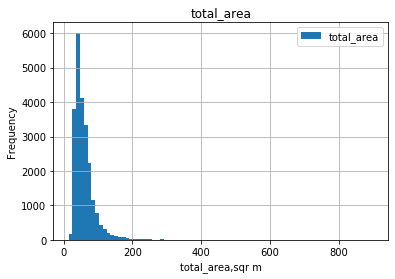

In [46]:
data.plot(y='total_area',kind='hist',title='total_area',bins=80,grid=True).set_xlabel('total_area,sqr m')


На гистограмме значений общей площади, можно наблюдать, что большинство значений в пределах от 80 до 120 кв.м., и в районе 200 кв.м. количество падает настолько, что случаии уже практически единичны. 

Text(0.5, 0, 'total_area,sqr m')

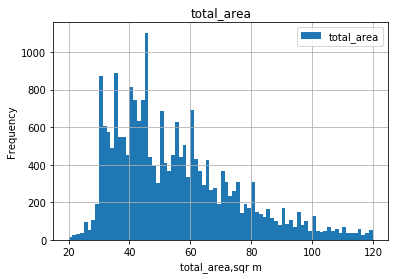

In [47]:
data.plot(y='total_area',kind='hist',range=(20,120),title='total_area',bins=80,grid=True).set_xlabel('total_area,sqr m')

In [48]:
data['last_price'].max()

763000000.0

Text(0.5, 0, 'price')

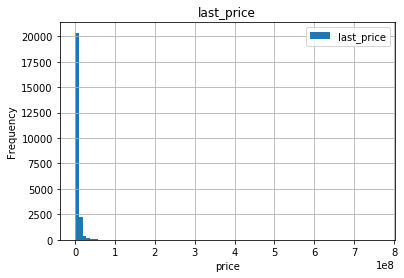

In [49]:
data.plot(y='last_price',kind='hist',title='last_price',bins=80,grid=True).set_xlabel('price')

По гистограмме цен можно сделать вывод, о самых популярных ценнах до 100 млн, все что дальше, уже редкие случаи. Уменьшим диапозон до 100млн, для наглядности.

Text(0.5, 0, 'price')

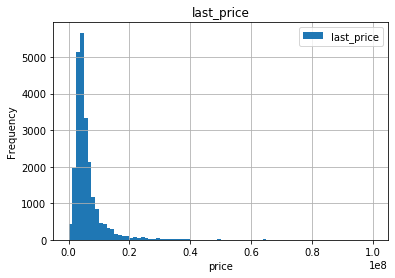

In [50]:
data.plot(y='last_price',kind='hist',title='last_price',range=(1,100000000),bins=80,grid=True).set_xlabel('price')

По новым границам, самы популярные цены, до примерно 10 млн, и чем дороже, тем их меньше.

Text(0.5, 0, 'room')

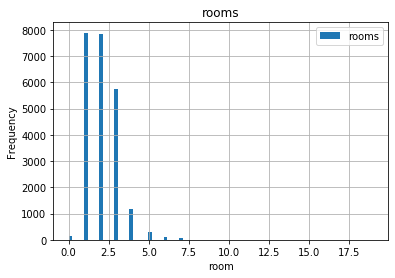

In [51]:
data.plot(y='rooms',kind='hist',title='rooms',bins=80,grid=True).set_xlabel('room')

Чем больше 5 комнат, тем меньше объявлений. Самый пик, это от 1 до 3 комнат примерно, а после 8 комна сильный спад, который практически равен 0.

Text(0.5, 0, 'ceilinling_height')

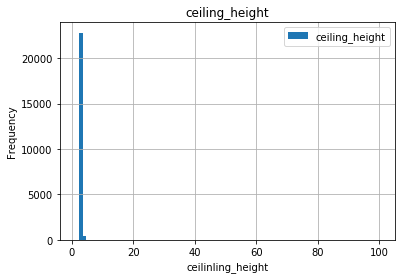

In [52]:
data.plot(y='ceiling_height',kind='hist',title='ceiling_height',bins=80,grid=True).set_xlabel('ceilinling_height')

Text(0.5, 0, 'ceilinling_height')

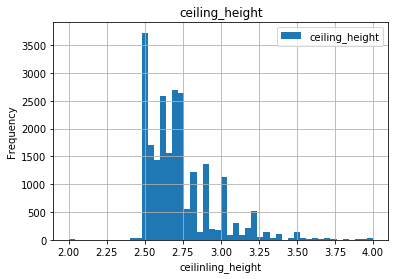

In [53]:
data.plot(y='ceiling_height',kind='hist',title='ceiling_height',bins=50,grid=True,range=(2,4)).set_xlabel('ceilinling_height')

Чуть больше 2м и чуть меньше 3х, самые распространеные квартиры, потолок выше 4м практически не найти.

Text(0.5, 0, 'days_exposition')

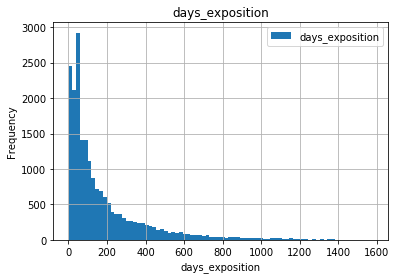

In [54]:
data.plot(y='days_exposition',kind='hist',title='days_exposition',bins=80,grid=True).set_xlabel('days_exposition')

In [55]:
sale_median=data['days_exposition'].median()
sale_q1=data['days_exposition'].quantile(0.25)
sale_q3=data['days_exposition'].quantile(0.75)
avg_sale = data['days_exposition'].mean()
print('Медиана времени актуальности обхявления: {:.2f}'.format(sale_median))
print('Среднее время продажи: {:.2f}'.format(avg_sale))

Медиана времени актуальности обхявления: 96.00
Среднее время продажи: 181.27


Для анализа детализируем, участок от 0 до 400, для понимая большой рпзницы между средним и медианой.

Быстрая продажа,если сделка произошла в срок до 45
Долгая продажа,если сделка произошла в срок от 232


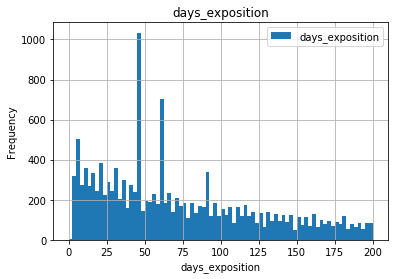

In [56]:
data.plot(y='days_exposition',kind='hist',title='days_exposition',bins=80,grid=True,range=(0,200)).set_xlabel('days_exposition')
sale_q1=data['days_exposition'].quantile(0.25)
sale_q3=data['days_exposition'].quantile(0.75)
print('Быстрая продажа,если сделка произошла в срок до {:.0f}'.format(sale_q1))
print('Долгая продажа,если сделка произошла в срок от {:.0f}'.format(sale_q3))

Большинство продаж происходит в рамках медийного времени, и дальше идет понижение количества продаж. Поэтому можно сделать вывод, что продажа квартир занимает до 96 суток, и можно сделать вывод, что более долгая продажа  ,считается долго. Очень быстрые продажи в районе 47 суток, и этих значений слишком много.

In [57]:
display(data.describe())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,living_total_area,kitchen_total_area
count,23290.000000,2.329000e+04,23290.000000,23290.000000,23290.000000,23290.00000,23290.000000,23290.000000,23290.000000,23290.000000,17867.000000,17890.000000,23290.000000,7954.000000,23290.000000,8920.000000,20142.000000,2.329000e+04,23290.000000,23290.000000,23290.000000,23290.000000,23290.000000
mean,9.904079,6.486479e+06,60.162800,2.075655,2.767029,10.62705,34.504179,5.855646,10.488306,0.592787,28790.036996,14210.909894,0.469858,489.968444,0.588321,519.028812,181.265912,9.918310e+04,2.566423,6.394118,2017.368184,0.564490,0.187673
std,5.683116,1.064312e+07,34.341993,1.070825,1.018820,6.57220,21.792727,4.854872,5.753942,0.959348,12644.477132,8624.697515,0.748948,340.017789,0.882286,277.846488,219.842973,5.015644e+04,1.788626,3.491950,1.037901,0.101842,0.070909
min,0.000000,1.219000e+04,14.000000,0.000000,1.000000,1.00000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.118300e+02,0.000000,1.000000,2014.000000,0.021583,0.025381
25%,6.000000,3.450000e+06,40.000000,1.000000,2.571801,5.00000,18.800000,2.000000,7.000000,0.000000,18543.500000,9257.750000,0.000000,288.000000,0.000000,294.000000,45.000000,7.643404e+04,1.000000,3.000000,2017.000000,0.500000,0.136195
50%,9.000000,4.650000e+06,52.000000,2.000000,2.700000,9.00000,30.000000,4.000000,9.100000,0.000000,26752.000000,13111.500000,0.000000,455.000000,0.000000,503.500000,96.000000,9.489857e+04,3.000000,6.000000,2017.000000,0.569328,0.173545
75%,14.000000,6.774440e+06,69.700000,3.000000,2.800000,16.00000,42.300000,8.000000,11.850000,1.000000,37247.000000,16285.000000,1.000000,612.000000,1.000000,732.000000,232.000000,1.140351e+05,4.000000,10.000000,2018.000000,0.632475,0.230263
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.00000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.787879


Можем наблюдать в каких столбцах есть большие различия, так например общая площадь,высота потолков, последняя стоимость, стоимость квадратного метра показывают большую разницу между 3 квартилем и максимумом, попробуем построить диаграмы размаха, и проверить наши выводы.

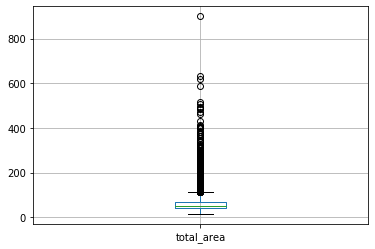

In [58]:
data.boxplot('total_area')

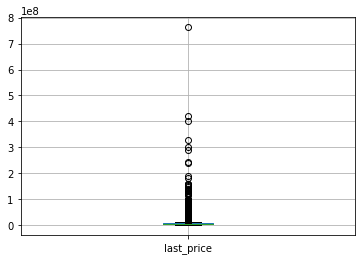

In [59]:
data.boxplot('last_price')

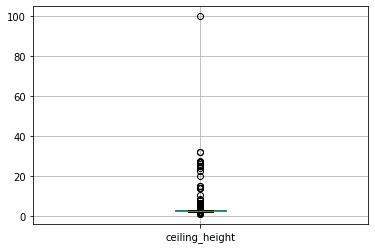

In [60]:
data.boxplot('ceiling_height')

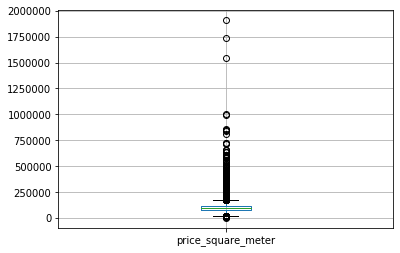

In [61]:
data.boxplot('price_square_meter')

Диаграма разброса доказывает наше предположение о некоторых выбросах в значении данных столбцов. Отфильтруем значения в нашем датафрейме.

Text(0.5, 0, 'total_area,sqr m')

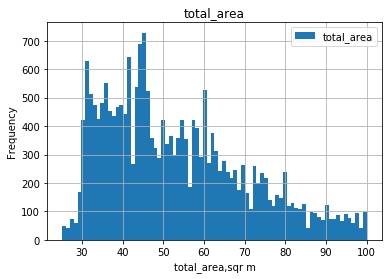

In [62]:
data['total_area']=data.query('25<total_area<=100')['total_area']
data.plot(y='total_area',kind='hist',title='total_area',bins=80,grid=True).set_xlabel('total_area,sqr m')

Text(0.5, 0, 'ceiling_height, m')

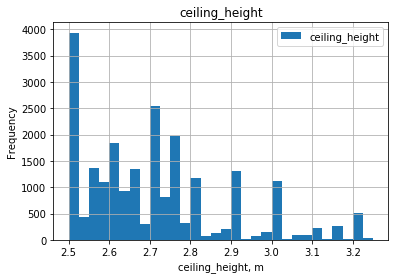

In [63]:
data['ceiling_height']=data.query('2.5<=ceiling_height<=3.25')['ceiling_height']
data.plot(y='ceiling_height',kind='hist',title='ceiling_height',bins=30,grid=True).set_xlabel('ceiling_height, m')

Text(0.5, 0, 'last_price')

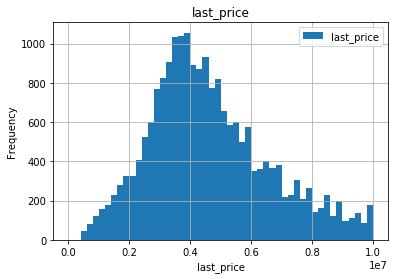

In [64]:
data['last_price']=data.query('last_price<=10000000')['last_price']
data.plot(y='last_price',kind='hist',title='last_price',bins=50,grid=True).set_xlabel('last_price')

In [65]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,living_total_area,kitchen_total_area
count,23290.000000,2.065300e+04,21361.000000,23290.000000,22378.000000,23290.00000,23290.000000,23290.000000,23290.000000,23290.000000,17867.000000,17890.000000,23290.000000,7954.000000,23290.000000,8920.000000,20142.000000,2.329000e+04,23290.000000,23290.000000,23290.000000,23290.000000,23290.000000
mean,9.904079,4.658918e+06,53.299215,2.075655,2.706744,10.62705,34.504179,5.855646,10.488306,0.592787,28790.036996,14210.909894,0.469858,489.968444,0.588321,519.028812,181.265912,9.918310e+04,2.566423,6.394118,2017.368184,0.564490,0.187673
std,5.683116,1.966111e+06,17.315082,1.070825,0.178489,6.57220,21.792727,4.854872,5.753942,0.959348,12644.477132,8624.697515,0.748948,340.017789,0.882286,277.846488,219.842973,5.015644e+04,1.788626,3.491950,1.037901,0.101842,0.070909
min,0.000000,1.219000e+04,25.200000,0.000000,2.500000,1.00000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.118300e+02,0.000000,1.000000,2014.000000,0.021583,0.025381
25%,6.000000,3.300000e+06,39.700000,1.000000,2.567143,5.00000,18.800000,2.000000,7.000000,0.000000,18543.500000,9257.750000,0.000000,288.000000,0.000000,294.000000,45.000000,7.643404e+04,1.000000,3.000000,2017.000000,0.500000,0.136195
50%,9.000000,4.350000e+06,50.000000,2.000000,2.694540,9.00000,30.000000,4.000000,9.100000,0.000000,26752.000000,13111.500000,0.000000,455.000000,0.000000,503.500000,96.000000,9.489857e+04,3.000000,6.000000,2017.000000,0.569328,0.173545
75%,14.000000,5.800000e+06,64.000000,3.000000,2.790000,16.00000,42.300000,8.000000,11.850000,1.000000,37247.000000,16285.000000,1.000000,612.000000,1.000000,732.000000,232.000000,1.140351e+05,4.000000,10.000000,2018.000000,0.632475,0.230263
max,50.000000,1.000000e+07,100.000000,19.000000,3.250000,60.00000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.787879


In [66]:
data=data.query('2100000<=last_price')
data=data.query('0<rooms<=7')
data=data.query('18<living_area<=80')
data=data.query('4<kitchen_area<=15')
data=data.query('days_exposition<=500')
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,living_total_area,kitchen_total_area
count,10927.000000,1.092700e+04,10825.000000,10927.000000,10678.000000,10927.000000,10927.000000,10927.000000,10927.000000,10927.000000,8865.000000,8876.000000,10927.000000,3727.000000,10927.000000,4089.000000,10927.000000,10927.000000,10927.000000,10927.000000,10927.000000,10927.000000,10927.000000
mean,9.912419,5.098934e+06,56.283095,2.187060,2.692464,10.432232,33.937228,5.667887,9.044236,0.608218,28812.121827,15029.924403,0.456575,477.188087,0.548092,542.649058,124.899606,91056.309348,2.586437,6.562002,2017.356273,0.594706,0.165454
std,5.582778,1.733377e+06,14.085654,0.792241,0.171387,6.161025,10.675802,4.546521,2.461798,0.960209,12921.898379,8461.578358,0.723621,306.329532,0.831958,274.618614,117.402146,24309.408853,1.785344,3.499009,0.853760,0.082845,0.049140
min,0.000000,2.100000e+06,25.200000,1.000000,2.500000,1.000000,18.020000,1.000000,4.100000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,16.000000,1.000000,16842.110000,0.000000,1.000000,2015.000000,0.226316,0.059933
25%,6.000000,3.815000e+06,45.000000,2.000000,2.550000,5.000000,27.000000,2.000000,7.000000,0.000000,17863.000000,10829.000000,0.000000,288.500000,0.000000,327.000000,41.000000,75510.365000,1.000000,3.000000,2017.000000,0.541146,0.129709
50%,10.000000,4.800000e+06,54.900000,2.000000,2.650000,9.000000,31.700000,4.000000,9.000000,0.000000,27189.000000,13606.000000,0.000000,451.000000,0.000000,544.000000,82.000000,90192.310000,3.000000,7.000000,2017.000000,0.596117,0.156522
75%,14.000000,6.149000e+06,65.000000,3.000000,2.759731,14.000000,41.236098,8.000000,10.700000,1.000000,37434.000000,16482.000000,1.000000,606.000000,1.000000,754.000000,179.000000,105102.040000,4.000000,10.000000,2018.000000,0.647482,0.191148
max,35.000000,1.000000e+07,100.000000,6.000000,3.250000,60.000000,80.000000,33.000000,15.000000,5.000000,83758.000000,64857.000000,3.000000,3064.000000,3.000000,1337.000000,500.000000,262711.860000,6.000000,12.000000,2019.000000,0.973262,0.393939


In [67]:
cor_data = data.loc[:,['last_price','total_area','rooms','cityCenters_nearest','kitchen_area','price_square_meter','living_area']]
cor_data ['price_sqrm_kitchen']=(cor_data['total_area']/cor_data['kitchen_area'])*(cor_data['last_price']/cor_data['kitchen_area'])
cor_data ['price_sqrm_living']=(cor_data['total_area']/cor_data['living_area'])*(cor_data['last_price']/cor_data['living_area'])
display(cor_data.corr()) 

,last_price,total_area,rooms,cityCenters_nearest,kitchen_area,price_square_meter,living_area,price_sqrm_kitchen,price_sqrm_living
last_price,1.000000,0.606922,0.313860,-0.339698,0.436002,0.632102,0.496798,0.411341,0.395556
total_area,0.606922,1.000000,0.724218,-0.069306,0.412888,-0.175684,0.894744,0.370765,-0.218499
rooms,0.313860,0.724218,1.000000,-0.035828,-0.072925,-0.322284,0.845573,0.575189,-0.546370
cityCenters_nearest,-0.339698,-0.069306,-0.035828,1.000000,-0.072142,-0.389695,-0.073661,-0.150165,-0.192121
kitchen_area,0.436002,0.412888,-0.072925,-0.072142,1.000000,0.149012,0.137898,-0.505558,0.427150
price_square_meter,0.632102,-0.175684,-0.322284,-0.389695,0.149012,1.000000,-0.246963,0.138014,0.724107
living_area,0.496798,0.894744,0.845573,-0.073661,0.137898,-0.246963,1.000000,0.545824,-0.506989
price_sqrm_kitchen,0.411341,0.370765,0.575189,-0.150165,-0.505558,0.138014,0.545824,1.000000,-0.253152
price_sqrm_living,0.395556,-0.218499,-0.546370,-0.192121,0.427150,0.724107,-0.506989,-0.253152,1.000000


По построенной матрице корреляции можно наблюдать, что стоимость квартиры зависит от площади, и количества комнат. Больший коэффициент кореляции по площади. Цена квадратного метра, положительно кореллирует с общей площадью и общей ценой, отрицательно коррелирует с количеством комнат и отдаленостью от центра. 

In [68]:
def floor_group(row):
    if row['floor']==1:
        return 1
    if row['floor']==row['floors_total']:
        return 2
    return 3
data['floor_group']=data.apply(floor_group,axis=1)
display(data['floor_group'].value_counts())


3    8097
2    1451
1    1379
Name: floor_group, dtype: int64

In [69]:
data_floor=data.pivot_table(index='floor_flat',values= ['last_price','price_square_meter'],aggfunc=('count','mean'))
display(data_floor.head())

last_price               price_square_meter              
                count          mean              count          mean
floor_flat                                                          
другой           8097  5.242049e+06               8097  93711.449327
первый           1379  4.540125e+06               1379  80846.407643
последний        1451  4.831390e+06               1451  85943.136396

Средняя цена квартиры, а также средняя цена квадратного метра больше на других этаж, но квадратный метр квадртиры с последнего этажа стоит больше, чем певрого.

In [70]:
df_date=data.pivot_table(index='weekday',values=['last_price','price_square_meter'],aggfunc=('mean'))
df_date.columns=['mean_pice','maen_sqr_price']
display(df_date.sort_values('maen_sqr_price',ascending=False).head(10))

,mean_pice,maen_sqr_price
weekday,,
5,5.163852e+06,92492.130734
3,5.115220e+06,91702.097050
2,5.094493e+06,91685.572054
4,5.123261e+06,90747.850288
0,5.106489e+06,90485.861543
1,5.075891e+06,90330.010596
6,4.976370e+06,90053.329172


Самая дорогая квартира выложена в пятницу, а самая дешёвая в субботу.

In [71]:

df_date=data.pivot_table(index='month',values=['last_price','price_square_meter'],aggfunc=('mean'))
df_date.columns=['mean_pice','maen_sqr_price']
display(df_date.sort_values('maen_sqr_price',ascending=False).head(10))

,mean_pice,maen_sqr_price
month,,
8,5.182373e+06,93509.562106
9,5.157595e+06,91641.649653
5,5.114328e+06,91371.075244
1,5.115709e+06,91294.652782
7,5.128953e+06,91139.852819
10,5.062043e+06,90974.108896
3,5.007664e+06,90934.879594
11,5.129410e+06,90928.609193
4,5.167632e+06,90728.608591


Обычно самые дорогие квартиры  в августе, а самые дешёвые в феврале.

In [72]:
df_date=data.pivot_table(index='year',values=['last_price','price_square_meter'],aggfunc=('mean'))
df_date.columns=['mean_price','maen_sqr_price']
display(df_date.sort_values('maen_sqr_price',ascending=False).head(10))

,mean_price,maen_sqr_price
year,,
2019,5.410010e+06,101089.406152
2018,5.113952e+06,92566.444836
2017,5.045498e+06,88966.198832
2016,5.058136e+06,88542.775832
2015,5.149742e+06,87741.161673


С каждым годом квартиры дорожают.

In [74]:
print(data['locality_name'].value_counts().head(10))

Санкт-Петербург      7576
посёлок Шушары        261
Колпино               213
Всеволожск            206
Пушкин                177
Гатчина               174
посёлок Мурино        162
посёлок Парголово     130
Выборг                129
Петергоф              112
Name: locality_name, dtype: int64


In [75]:
df_locality=data.pivot_table(index='locality_name',values = 'price_square_meter', aggfunc=['count','mean'])
df_locality.columns=['count','mean']
display(df_locality.sort_values('count',ascending=False).head(10))

,count,mean
locality_name,,
Санкт-Петербург,7576,100326.710313
посёлок Шушары,261,74028.474943
Колпино,213,71293.372864
Всеволожск,206,65429.869369
Пушкин,177,96907.418531
Гатчина,174,67768.598046
посёлок Мурино,162,79048.128395
посёлок Парголово,130,83691.646231
Выборг,129,56810.992791


Самая большая цена за кв метр в Санкт-Петербурге, а самая маленькая в Выборге.

In [76]:
data.dropna(subset=['last_price'],inplace=True)
print(data['last_price'].isna().sum())

0


In [77]:
df_spb=data.copy()
df_spb=df_spb.query('locality_name=="Санкт-Петербург"')
df_spb['center_nearest_km']=(df_spb['cityCenters_nearest']/1000).round()
df_spb['coast_km']=df_spb['last_price']/df_spb['center_nearest_km']
display(df_spb.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,floor_flat,living_total_area,kitchen_total_area,floor_group,center_nearest_km,coast_km
9,18,5400000.0,61.0,2017-02-26,3,2.500000,9,43.6,7,False,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,88524.59,6,2,2017,другой,0.714754,0.106557,3,15.0,360000.000000
10,5,5050000.0,39.6,2017-11-16,1,2.670000,12,20.3,3,False,False,False,8.5,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137.0,127525.25,3,11,2017,другой,0.512626,0.214646,3,14.0,360714.285714
15,16,4650000.0,39.0,2017-11-18,1,2.747359,14,20.5,5,False,False,False,7.6,1,Санкт-Петербург,12900.0,14259.0,1,590.0,1,296.0,19.0,119230.77,5,11,2017,другой,0.525641,0.194872,3,14.0,332142.857143
16,11,6700000.0,82.0,2017-11-23,3,3.050000,5,55.6,1,False,False,False,9.0,0,Санкт-Петербург,22108.0,10698.0,3,420.0,0,NaN,397.0,81707.32,3,11,2017,первый,0.678049,0.109756,1,11.0,609090.909091
18,8,3250000.0,31.0,2017-01-27,1,2.500000,5,19.4,2,False,False,False,5.6,1,Санкт-Петербург,44060.0,10842.0,1,759.0,0,NaN,168.0,104838.71,4,1,2017,другой,0.625806,0.180645,3,11.0,295454.545455


Text(0, 0.5, 'mean_cost_km')

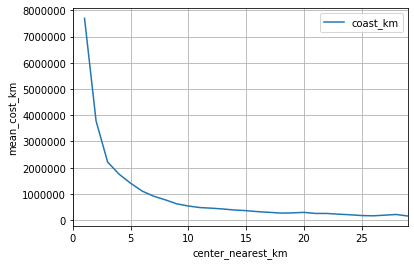

In [79]:
df_spb_km=df_spb.pivot_table(index='center_nearest_km',values='coast_km')
df_spb_km.plot(grid=True).set_ylabel('mean_cost_km')

 Значительные изменения происходят в районе 10 км, цена уменьшается плавнее. Примем за центр до 5 км удаллености.

In [80]:
df_spb_center=df_spb.query('center_nearest_km<=5')
display(df_spb_center.describe())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,living_total_area,kitchen_total_area,floor_group,center_nearest_km,coast_km
count,773.000000,7.730000e+02,737.000000,773.000000,655.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,526.000000,773.000000,551.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.0
mean,9.433376,7.050789e+06,64.770787,2.483829,2.961105,5.717982,40.979422,3.319534,9.882561,0.133247,23831.677878,3788.974127,1.053040,462.577947,1.306598,457.620690,143.848642,109510.637413,2.505821,6.799483,2017.232859,0.608975,0.155613,2.464424,3.741268,inf
std,5.679458,1.609591e+06,16.436112,0.877945,0.189776,2.723559,13.690097,1.988984,2.366253,0.451359,3539.140439,1248.598021,0.920988,322.364367,1.128032,277.348792,128.203678,25564.177846,1.700817,3.375452,0.872794,0.085521,0.046144,0.763710,1.258265,NaN
min,0.000000,2.100000e+06,27.000000,1.000000,2.500000,2.000000,18.100000,1.000000,5.000000,0.000000,18039.000000,208.000000,0.000000,17.000000,0.000000,22.000000,3.000000,16842.110000,0.000000,1.000000,2015.000000,0.226316,0.060606,1.000000,0.000000,420000.0
25%,5.000000,5.850000e+06,51.300000,2.000000,2.840000,4.000000,30.044667,2.000000,8.000000,0.000000,21158.000000,3082.000000,0.000000,269.500000,0.000000,221.500000,42.000000,91194.970000,1.000000,4.000000,2017.000000,0.555556,0.123440,2.000000,3.000000,1400000.0
50%,9.000000,6.999000e+06,64.000000,2.000000,2.991313,5.000000,39.756429,3.000000,10.000000,0.000000,23548.000000,4087.000000,1.000000,417.500000,1.000000,433.000000,98.000000,105633.800000,3.000000,7.000000,2017.000000,0.610169,0.149402,3.000000,4.000000,1775000.0
75%,13.000000,8.300000e+06,77.000000,3.000000,3.155000,6.000000,50.000000,4.000000,11.500000,0.000000,25187.000000,4805.000000,2.000000,584.000000,2.000000,671.500000,222.000000,125000.000000,4.000000,10.000000,2018.000000,0.664103,0.180535,3.000000,5.000000,2450000.0
max,32.000000,1.000000e+07,100.000000,5.000000,3.250000,25.000000,80.000000,19.000000,15.000000,4.000000,34033.000000,5494.000000,3.000000,2295.000000,3.000000,1156.000000,497.000000,262711.860000,6.000000,12.000000,2019.000000,0.972222,0.339080,3.000000,5.000000,inf


Можно сделать вывод ,что в центре высота потолков больше, логично, что расстояние от центра меньше, число комнат в рйфоне 3х, площадь жилья около 80 кв м.

In [81]:
df_spb_cor=df_spb_center.loc[:,['last_price','rooms','floor','first_day_exposition','cityCenters_nearest','price_square_meter','kitchen_area','living_area','total_area','floor_group']]
display(df_spb_cor.corr())

,last_price,rooms,floor,cityCenters_nearest,price_square_meter,kitchen_area,living_area,total_area,floor_group
last_price,1.000000,0.384689,0.147363,-0.081951,0.263317,0.333320,0.540216,0.620041,0.205992
rooms,0.384689,1.000000,-0.095325,-0.035106,-0.514464,0.087194,0.795159,0.734093,0.037296
floor,0.147363,-0.095325,1.000000,0.176031,0.191765,0.114608,-0.076466,-0.016604,0.308941
cityCenters_nearest,-0.081951,-0.035106,0.176031,1.000000,-0.018906,0.032702,-0.048576,-0.059847,0.118515
price_square_meter,0.263317,-0.514464,0.191765,-0.018906,1.000000,-0.148708,-0.535685,-0.510644,0.098390
kitchen_area,0.333320,0.087194,0.114608,0.032702,-0.148708,1.000000,0.215199,0.366243,0.097985
living_area,0.540216,0.795159,-0.076466,-0.048576,-0.535685,0.215199,1.000000,0.902055,0.073913
total_area,0.620041,0.734093,-0.016604,-0.059847,-0.510644,0.366243,0.902055,1.000000,0.113171
floor_group,0.205992,0.037296,0.308941,0.118515,0.098390,0.097985,0.073913,0.113171,1.000000


Цена положительно кореелирует с количеством комнат, с этажом ,с площадью кухни и жилой зоны, общей площадью и отрицательно корелирует с расстоянием до центра. Больший коэффициент кореляции у общей площади. 

In [82]:
display(df_spb_center.pivot_table(index='floor_group',values=['last_price','price_square_meter']))
display(df_spb_center.pivot_table(index='weekday',values=['last_price','price_square_meter']))
display(df_spb_center.pivot_table(index='month',values=['last_price','price_square_meter']))
display(df_spb_center.pivot_table(index='year',values=['last_price','price_square_meter']))

,last_price,price_square_meter
floor_group,,
1,6.257379e+06,105842.631550
2,7.109865e+06,106070.808462
3,7.241638e+06,111579.871168


,last_price,price_square_meter
weekday,,
0,7.150200e+06,108974.323167
1,7.046097e+06,105344.325940
2,7.016843e+06,112351.756557
3,6.837772e+06,108162.482327
4,7.107186e+06,110482.075274
5,7.144346e+06,119465.353898
6,7.431735e+06,102365.315588


,last_price,price_square_meter
month,,
1,7.167400e+06,110212.824000
2,7.264066e+06,107403.157105
3,7.218739e+06,117991.293188
4,7.073594e+06,109399.521613
5,7.101986e+06,114821.239318
6,6.801047e+06,104921.963016
7,7.219803e+06,109460.034085
8,7.005535e+06,110011.462676
9,7.001574e+06,108250.840455


,last_price,price_square_meter
year,,
2015,6.749537e+06,107580.500000
2016,7.079408e+06,104559.280654
2017,7.001674e+06,107795.067595
2018,7.046960e+06,111194.550077
2019,7.613550e+06,127732.004250


По группе этажа мы видим, что большое значение цены в центре сосредоточно на других этажах.
По месяцу самая высокая цена была в феврале, а самая низкая в декабре.
По году самые дорогие квартиры в центра были в 2019 году, и с 2015 года квартиры в этой части города, как и во все анализируемой области росли каждый год.
Самые дорогие квартиры в центре размещены в воскресенье, а самы дешёвые в четверг.

## Общий вывод

В ходе анализа данного датасета исследовали зависимости стоимости квартир, от различных параметров, по уточненым данным выяснили район центра и проанализировали квартиры в нем. Самый дорогие квартиры оказались выставлены в ферале. По проанализированным данным, можно сказать, что с каждым годом цена на квартиры растет. Цена за квадратный метр, которая полность зависит от общей площади и стоимости квартиры, коррелирует, с растоянием до центра города, с количеством комнат, с площадью кухни и жилой зоны. а также завист от этажа квартиры. Высота потолков, тоже влияет на стоимость квартиры. Городом с самым большим количеством объявлений оказался Санкт-Петербург. Для получения ответов на поставленные вопросы, было необходимо изучить данные, найти в них ошибки и недочеты, "причесать" датачет(заполнить пропуски, привести столбцы к правильным типам данным), удалить некторрые пропущенные значения, проработать выбросы, чтобы слишком аномальные значения не мешали в расчетах, и гистограммах, после объеденить данные в группы по требуемым критериям и получить ответы на вопросы.